In [1]:
# Author                 :  Mohammad Noor Ul hasan
# Start Date             :  13/Feb/19

# Dependencies(Modules ) :  Tensorflow -> to create neural networks
#                           Sklearn -> for one hot encoding

# Optional Dependency    :  matplotlib -> to view images in notebook
#                           pylab -> to set figure size
#                           warnings -> to ignore warning
#                           tqdm -> to see progress bars

# Last Edited            :  14/Feb/19

In [2]:
# Importing required libraries
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
import warnings
from tqdm import tqdm_notebook
warnings.filterwarnings("ignore")

In [3]:
def display(image_objects, title = "title"):
    """
        Signature : display(image_objects, title = \"title\")
        Display Image using Matplotlib
        @parms image_object : A numpy array which stores image
        @param title        : A string which contain title for the image
                              Default : title
    """
    nImages = len(image_objects)
    rcParams['figure.figsize'] = nImages*2, 3 #Setting size of the figure
    for i in range(nImages):
        plt.subplot(1, nImages, i+1) 
        plt.imshow(image_objects[i], cmap = 'gray') # ploting image
        plt.title("label " + str(title[i])) # setting image label
        # disable x and y ticks
        plt.xticks([]) 
        plt.yticks([])
    
def batches(batch_size, features, labels):
    """
        Signature : batches(batch_size, features, labels)
        Create batches of features and labels
        @param batch_size : A integer which define size of the batch
        @param features   : List or numpy array of features
        @param labels     : List or numpy array of labels
        
        return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels),"Length of features != length of labels"
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]] # Dividing batches
        outout_batches.append(batch) 
        
    return outout_batches

In [4]:
#Loading MNIST data set into the memory
mnistDataset = tf.keras.datasets.mnist
(featuresTrain, labelsTrain),(featuresTest, labelsTest) = mnistDataset.load_data()


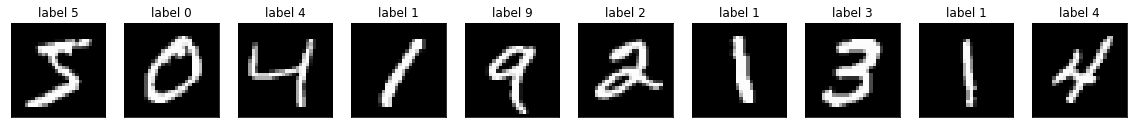

In [5]:
#Displaying images how the look like
display(featuresTrain[0:10],labelsTrain[0:10])

In [6]:
#Converting labels into onehotencoded format
onehot_encoder = OneHotEncoder(sparse=False)
labelsTrain = labelsTrain.reshape(len(labelsTrain), 1)
labelsTest = labelsTest.reshape(len(labelsTest), 1)
labelsTrain = onehot_encoder.fit_transform(labelsTrain)
labelsTest = onehot_encoder.fit_transform(labelsTest)

In [7]:
#Setting values
nInputNodes = 784 # Defining number of nodes in the input layer 
nHiddenNodes = 256 # Defining number of nodes in the Hidden layer
nOutputNodes = 10 # Defining number of nodes in the Output layer
learningRate = 0.001 # Rate at which our networks learn
epoches = 40 # Number of epoches that is number of itteration over the dataset
batchSize =  128 # Size of one batch

In [8]:
# Weight of the layers
weights = {
    "inputToHidden" : tf.Variable(tf.truncated_normal([nInputNodes, nHiddenNodes]), name = "weightInputToHidden"),
    "hiddenToOutput" : tf.Variable(tf.truncated_normal([nHiddenNodes,nOutputNodes]), name = "weightHiddenToOutput")
}
#Bias of the layers
bias = {
    "inputToHidden" : tf.Variable(tf.zeros([nHiddenNodes]),name = "biasInputToHidden"),
    "hiddenToOutput" : tf.Variable(tf.zeros([nOutputNodes]), name = "biasHiddenToOutput")
}

originalFeatures = tf.placeholder(tf.float32,[None, 28, 28], name = "originalFeatures") # Tensor for features
labels = tf.placeholder(tf.float32, [None,nOutputNodes],name = "labels") # Tensor for labels
reshapedFeatures = tf.reshape(originalFeatures, [-1, nInputNodes], name = "reshapedFeatures") # Tensor to reshaped feature from 2D to 1D

# None and -1 is feed so that they can N number of images features 

In [9]:
# Calculation for input layer to hidden layer 
# hidden_layer = Relu( input_layer * input_to_hidden_weight + input_to_hidden_bias )
hiddenLayerOutput = tf.add(tf.matmul(reshapedFeatures,weights["inputToHidden"]),bias["inputToHidden"])
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)

# Calculation for hidden layer to output layer 
# output_layer = hidden_layer * hidden_to_output_weight + hidden_to_output_bias
output = tf.add(tf.matmul(hiddenLayerOutput, weights["hiddenToOutput"]),bias["hiddenToOutput"])

# From all the output node which has maximum output is the predicted label
# node_index which contain higest value is the prediction
correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))

# Cost function
# We used cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=labels))

# Optimizer of our network
# We used Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningRate).minimize(cost)

# To check accuracy of the network 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# To initialize all the variables
init = tf.global_variables_initializer()

## <center>  Layer wise Structure of Neural Networks <center>

<img src = "Images/Structure of the Neural network.png" />

In [10]:
with tf.Session() as sess:
    sess.run(init) # Initializing all the variables
    totalBatches = batches(batchSize, featuresTrain, labelsTrain) # Dividing features and labels into batches
    for epoch in tqdm_notebook(range(epoches), desc = "Training Progress"):
        for batchFeatures, batchLabels in totalBatches:
            # Training the network over batches
            sess.run(optimizer,feed_dict = {originalFeatures : batchFeatures,labels : batchLabels})
            
        if (epoch % 1) == 0:
            # Checking the cost of the network
            c = sess.run(cost, feed_dict={originalFeatures : featuresTrain,labels : labelsTrain})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
            
    print("Optimization Finished!")
    print("Accuracy on Training Data: ", accuracy.eval({originalFeatures: featuresTrain, labels: labelsTrain})*100,"%")
    print("Accuracy on Testing Data: ", "{:.9f}".format(accuracy.eval({originalFeatures: featuresTest, labels: labelsTest})*100),"%")
    

Epoch: 0001 cost= 275.880615234
Epoch: 0002 cost= 139.885620117
Epoch: 0003 cost= 103.744834900
Epoch: 0004 cost= 75.553909302
Epoch: 0005 cost= 61.147274017
Epoch: 0006 cost= 50.747707367
Epoch: 0007 cost= 44.669040680
Epoch: 0008 cost= 33.425750732
Epoch: 0009 cost= 33.107646942
Epoch: 0010 cost= 24.761816025
Epoch: 0011 cost= 27.251876831
Epoch: 0012 cost= 23.601758957
Epoch: 0013 cost= 19.275121689
Epoch: 0014 cost= 16.939208984
Epoch: 0015 cost= 17.460924149
Epoch: 0016 cost= 14.559545517
Epoch: 0017 cost= 14.180701256
Epoch: 0018 cost= 13.236029625
Epoch: 0019 cost= 10.641518593
Epoch: 0020 cost= 9.954970360
Epoch: 0021 cost= 9.009322166
Epoch: 0022 cost= 7.939370155
Epoch: 0023 cost= 8.228765488
Epoch: 0024 cost= 7.973818779
Epoch: 0025 cost= 5.781638622
Epoch: 0026 cost= 6.521928787
Epoch: 0027 cost= 6.455393314
Epoch: 0028 cost= 6.691330433
Epoch: 0029 cost= 6.025906086
Epoch: 0030 cost= 6.213767529
Epoch: 0031 cost= 4.593094826
Epoch: 0032 cost= 4.492227077
Epoch: 0033 cost= 

In [11]:
!tensorboard --logdir=graph

TensorBoard 1.12.2 at http://noor:6006 (Press CTRL+C to quit)
^C
